# Praktikum 7 - Support Vector Machine (SVM)
## Klasifikasi Apples dan Oranges

Dataset: `apples_and_oranges.csv`
- **Weight**: Berat buah
- **Size**: Ukuran buah
- **Class**: Kelas (apple/orange)

## 1. Import Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Load Dataset

In [8]:
# Load data
df = pd.read_csv('../data/apples_and_oranges.csv')

# Tampilkan informasi dataset
print("Shape dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nStatistik deskriptif:")
print(df.describe())
print("\nDistribusi kelas:")
print(df['Class'].value_counts())

Shape dataset: (40, 3)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB
None

First 5 rows:
   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange

Statistik deskriptif:
          Weight       Size
count  40.000000  40.000000
mean   70.200000   4.922750
std     3.039906   0.590063
min    65.000000   4.010000
25%    68.000000   4.360000
50%    70.000000   4.930000
75%    73.000000   5.472500
max    75.000000   5.850000

Distribusi kelas:
Class
orange    20
apple     20
Name: count, dtype: int64


## 3. Persiapan Data (Split Dataset)

In [9]:
# Pisahkan fitur (X) dan label (y)
X = df[['Weight', 'Size']].values
y = df['Class'].values

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Total data: {len(X)}")
print(f"Data training: {len(X_train)}")
print(f"Data testing: {len(X_test)}")
print(f"\nDistribusi kelas training:")
print(pd.Series(y_train).value_counts())
print(f"\nDistribusi kelas testing:")
print(pd.Series(y_test).value_counts())

Total data: 40
Data training: 32
Data testing: 8

Distribusi kelas training:
apple     16
orange    16
Name: count, dtype: int64

Distribusi kelas testing:
apple     4
orange    4
Name: count, dtype: int64


## 4. Membangun Model SVM dengan Kernel Linear

In [10]:
# Inisialisasi dan training model SVM dengan kernel linear
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

print("Model SVM dengan kernel linear berhasil dilatih!")
print(f"Support vectors: {svm_model.n_support_}")
print(f"Support vectors per class: {svm_model.support_vectors_.shape}")

Model SVM dengan kernel linear berhasil dilatih!
Support vectors: [2 3]
Support vectors per class: (5, 2)


## 5. Prediksi dan Evaluasi Model

In [11]:
# Prediksi pada data training
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data testing
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Tampilkan hasil akurasi
print("="*50)
print("EVALUASI AKURASI MODEL SVM (Linear Kernel)")
print("="*50)
print(f"Akurasi Training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi Testing:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*50)

EVALUASI AKURASI MODEL SVM (Linear Kernel)
Akurasi Training: 1.0000 (100.00%)
Akurasi Testing:  1.0000 (100.00%)


## 6. Classification Report

In [12]:
# Classification Report untuk data testing
print("\n" + "="*50)
print("CLASSIFICATION REPORT (Testing Data)")
print("="*50)
print(classification_report(y_test, y_test_pred))

# Classification Report untuk data training
print("\n" + "="*50)
print("CLASSIFICATION REPORT (Training Data)")
print("="*50)
print(classification_report(y_train, y_train_pred))


CLASSIFICATION REPORT (Testing Data)
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


CLASSIFICATION REPORT (Training Data)
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## 7. Visualisasi Confusion Matrix

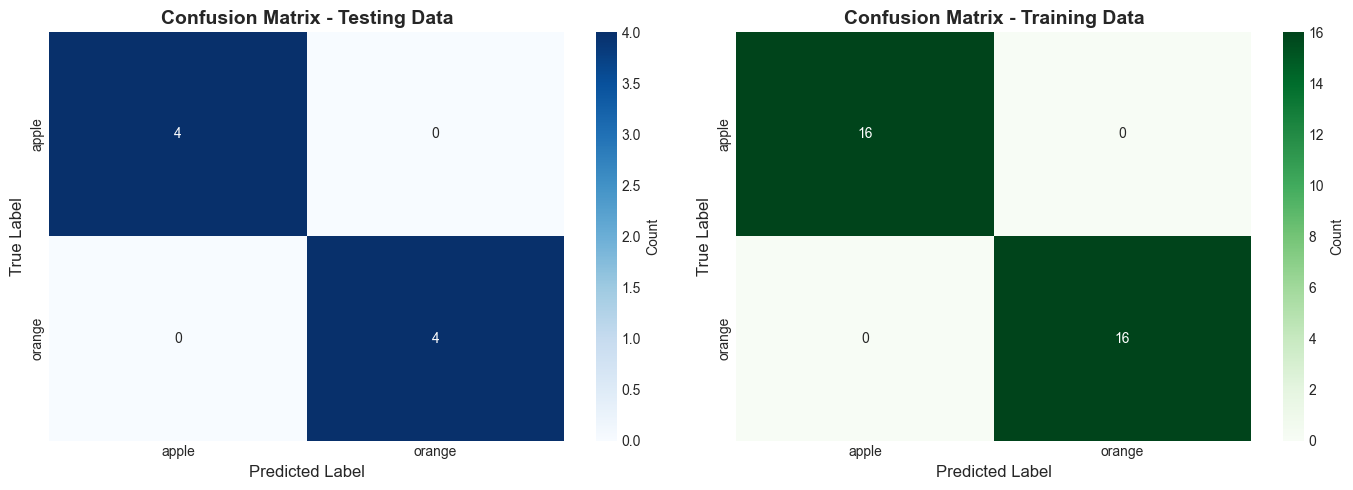

Confusion Matrix Testing:
[[4 0]
 [0 4]]

Confusion Matrix Training:
[[16  0]
 [ 0 16]]


In [13]:
# Hitung confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix untuk Testing Data
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['apple', 'orange'], 
            yticklabels=['apple', 'orange'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Testing Data', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Confusion Matrix untuk Training Data
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['apple', 'orange'], 
            yticklabels=['apple', 'orange'],
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Confusion Matrix - Training Data', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

print(f"Confusion Matrix Testing:\n{cm_test}")
print(f"\nConfusion Matrix Training:\n{cm_train}")

## 8. Visualisasi 2D - Scatter Plot dengan Decision Boundary

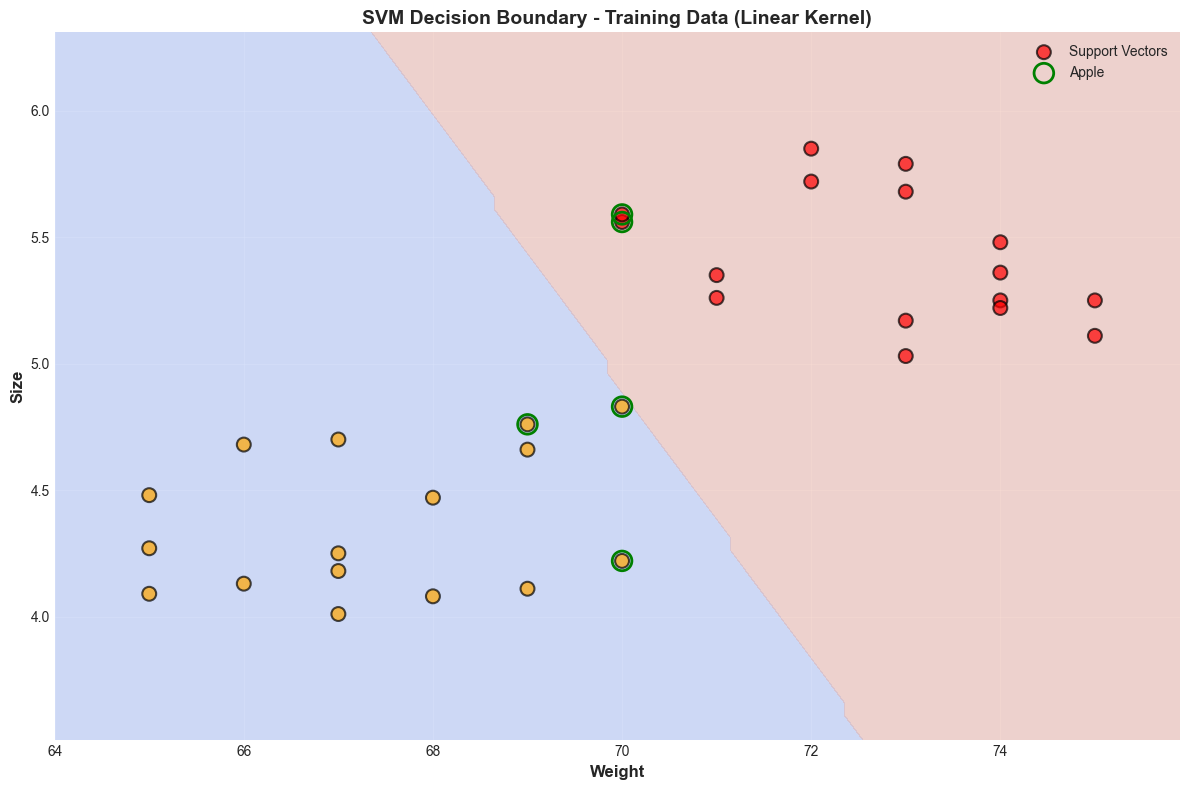

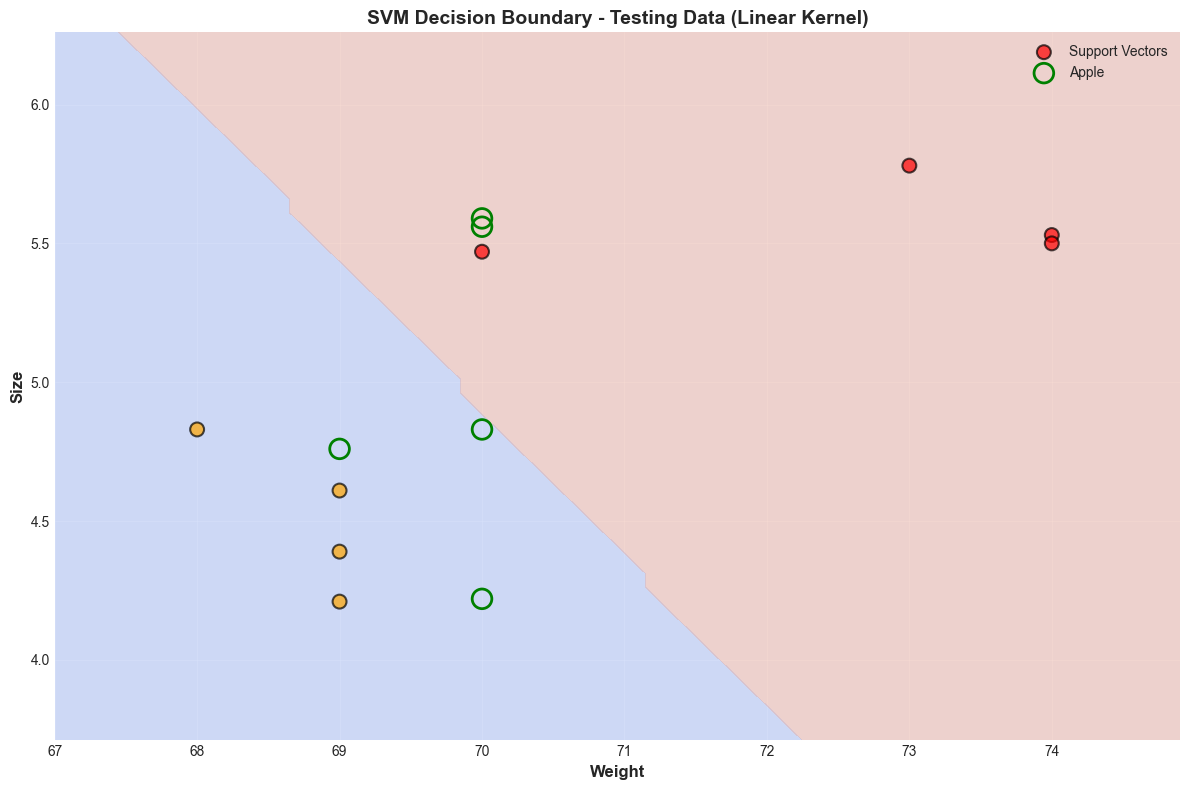

In [16]:
# Fungsi untuk membuat decision boundary
def plot_decision_boundary(X, y, model, title):
    # Set min dan max dengan margin
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Buat mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.05))
    
    # Prediksi untuk setiap titik di mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    
    # Convert string labels to numeric for plotting
    Z_numeric = np.where(Z == 'apple', 1, 0)
    Z_numeric = Z_numeric.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 8))
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='coolwarm', levels=1)
    
    # Plot data points
    colors = ['red' if label == 'apple' else 'orange' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black', linewidth=1.5, alpha=0.7)
    
    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=200, facecolors='none', edgecolors='green', linewidth=2, 
                label='Support Vectors')
    
    plt.xlabel('Weight', fontsize=12, fontweight='bold')
    plt.ylabel('Size', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(['Support Vectors', 'Apple', 'Orange'], loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualisasi untuk data training dan testing
plot_decision_boundary(X_train, y_train, svm_model, 
                       'SVM Decision Boundary - Training Data (Linear Kernel)')
plot_decision_boundary(X_test, y_test, svm_model, 
                       'SVM Decision Boundary - Testing Data (Linear Kernel)')

## 9. Visualisasi 3D - Scatter Plot

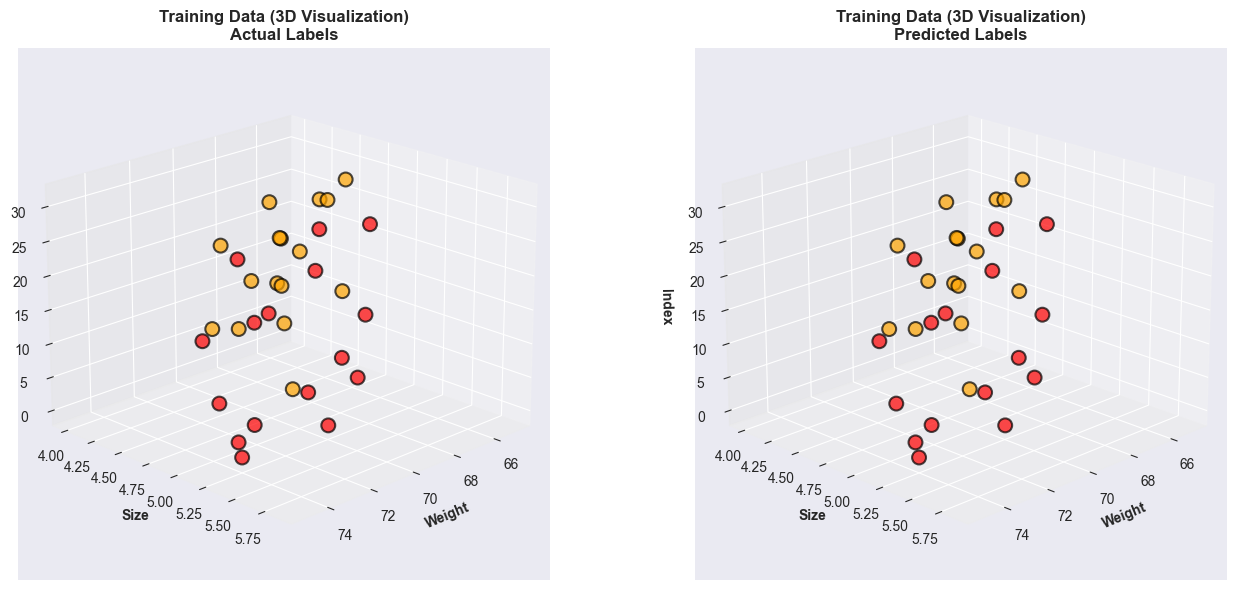

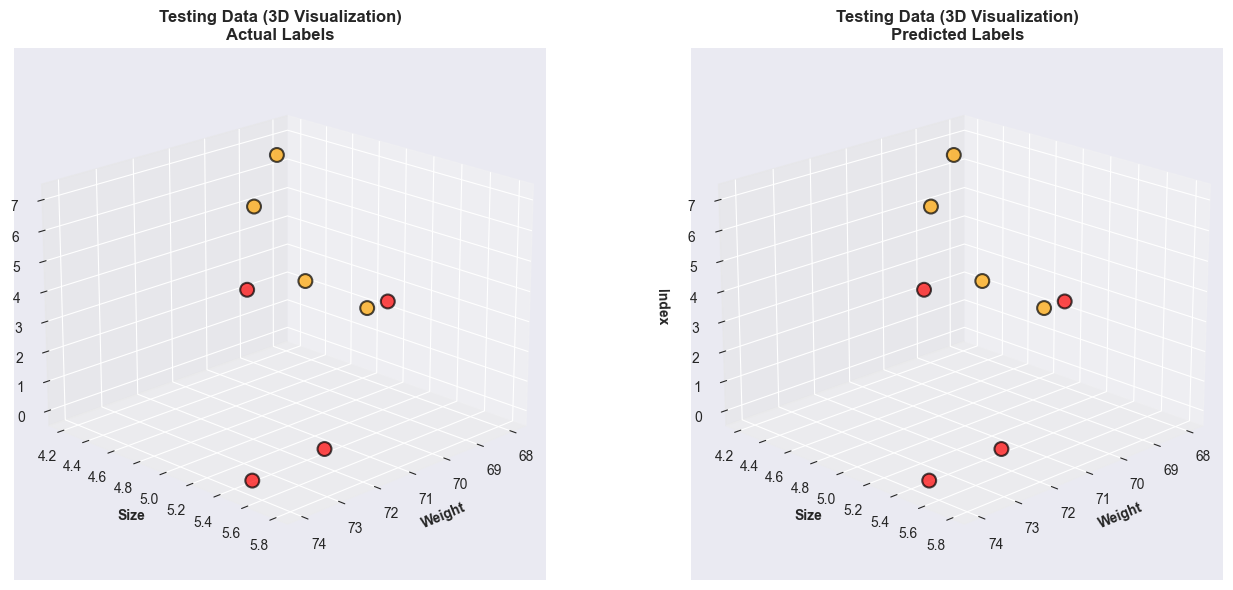

In [17]:
# Fungsi untuk visualisasi 3D
def plot_3d_visualization(X, y, y_pred, title):
    fig = plt.figure(figsize=(14, 6))
    
    # Plot 1: Data Aktual
    ax1 = fig.add_subplot(121, projection='3d')
    colors_actual = ['red' if label == 'apple' else 'orange' for label in y]
    ax1.scatter(X[:, 0], X[:, 1], range(len(X)), 
                c=colors_actual, s=100, edgecolors='black', 
                linewidth=1.5, alpha=0.7)
    ax1.set_xlabel('Weight', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Size', fontsize=10, fontweight='bold')
    ax1.set_zlabel('Index', fontsize=10, fontweight='bold')
    ax1.set_title(f'{title}\nActual Labels', fontsize=12, fontweight='bold')
    ax1.view_init(elev=20, azim=45)
    
    # Plot 2: Prediksi Model
    ax2 = fig.add_subplot(122, projection='3d')
    colors_pred = ['red' if label == 'apple' else 'orange' for label in y_pred]
    ax2.scatter(X[:, 0], X[:, 1], range(len(X)), 
                c=colors_pred, s=100, edgecolors='black', 
                linewidth=1.5, alpha=0.7)
    ax2.set_xlabel('Weight', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Size', fontsize=10, fontweight='bold')
    ax2.set_zlabel('Index', fontsize=10, fontweight='bold')
    ax2.set_title(f'{title}\nPredicted Labels', fontsize=12, fontweight='bold')
    ax2.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    plt.show()

# Visualisasi 3D untuk Training dan Testing Data
plot_3d_visualization(X_train, y_train, y_train_pred, 'Training Data (3D Visualization)')
plot_3d_visualization(X_test, y_test, y_test_pred, 'Testing Data (3D Visualization)')

## 10. Visualisasi 3D - Decision Surface dengan Hyperplane

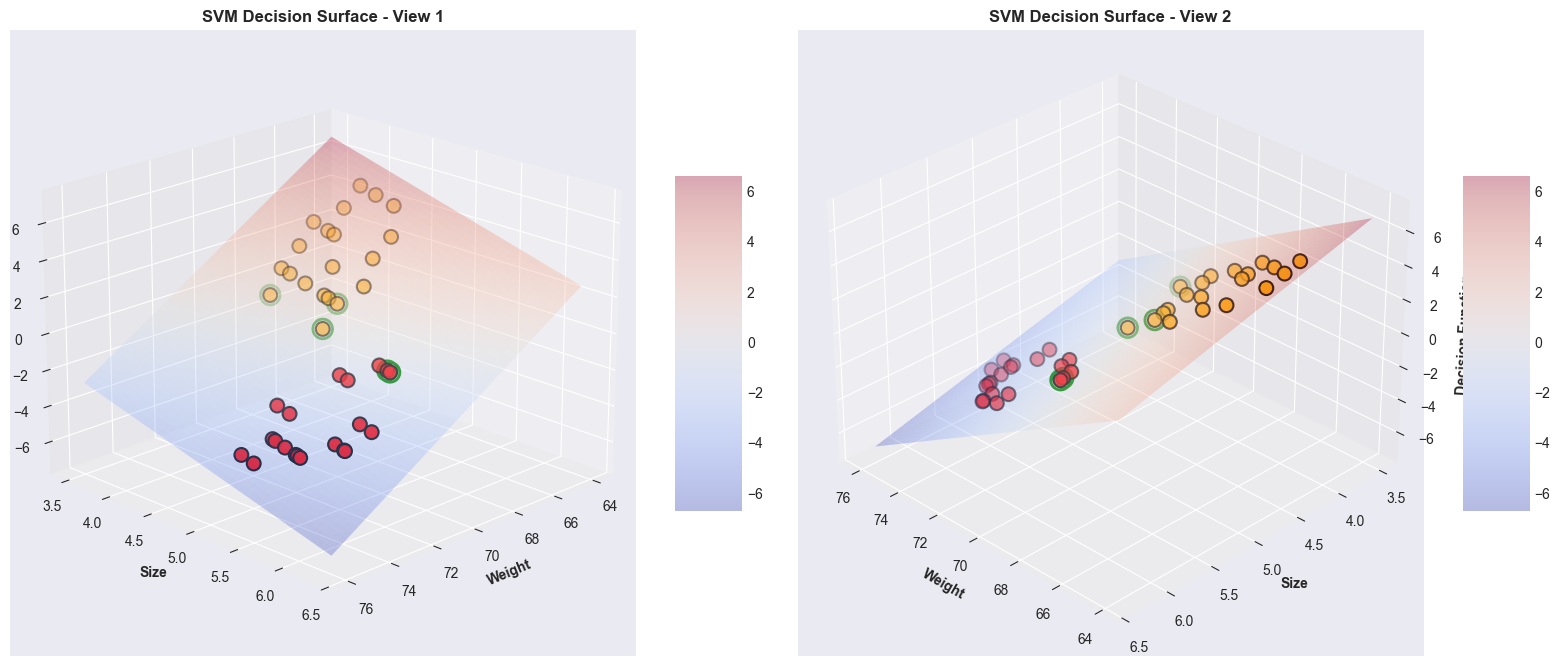

In [18]:
# Visualisasi 3D dengan Decision Surface
fig = plt.figure(figsize=(16, 7))

# Buat mesh grid untuk decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Prediksi untuk decision surface
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot 1: View 1
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(xx, yy, Z, alpha=0.3, cmap='coolwarm')
colors = ['red' if label == 'apple' else 'orange' for label in y]
ax1.scatter(X[:, 0], X[:, 1], 
            svm_model.decision_function(X), 
            c=colors, s=100, edgecolors='black', linewidth=1.5)
ax1.scatter(svm_model.support_vectors_[:, 0], 
            svm_model.support_vectors_[:, 1], 
            svm_model.decision_function(svm_model.support_vectors_), 
            s=200, facecolors='none', edgecolors='green', linewidth=2)
ax1.set_xlabel('Weight', fontsize=10, fontweight='bold')
ax1.set_ylabel('Size', fontsize=10, fontweight='bold')
ax1.set_zlabel('Decision Function', fontsize=10, fontweight='bold')
ax1.set_title('SVM Decision Surface - View 1', fontsize=12, fontweight='bold')
ax1.view_init(elev=20, azim=45)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Plot 2: View 2 (Rotated)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xx, yy, Z, alpha=0.3, cmap='coolwarm')
ax2.scatter(X[:, 0], X[:, 1], 
            svm_model.decision_function(X), 
            c=colors, s=100, edgecolors='black', linewidth=1.5)
ax2.scatter(svm_model.support_vectors_[:, 0], 
            svm_model.support_vectors_[:, 1], 
            svm_model.decision_function(svm_model.support_vectors_), 
            s=200, facecolors='none', edgecolors='green', linewidth=2)
ax2.set_xlabel('Weight', fontsize=10, fontweight='bold')
ax2.set_ylabel('Size', fontsize=10, fontweight='bold')
ax2.set_zlabel('Decision Function', fontsize=10, fontweight='bold')
ax2.set_title('SVM Decision Surface - View 2', fontsize=12, fontweight='bold')
ax2.view_init(elev=30, azim=135)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

## 11. Kesimpulan

In [19]:
print("="*60)
print("KESIMPULAN ANALISIS SVM")
print("="*60)
print(f"✓ Model SVM dengan kernel linear telah berhasil dibuat")
print(f"✓ Dataset: apples_and_oranges.csv")
print(f"✓ Total data: {len(X)} samples")
print(f"✓ Fitur: Weight dan Size")
print(f"✓ Split ratio: 80% training, 20% testing")
print(f"✓ Akurasi Training: {train_accuracy*100:.2f}%")
print(f"✓ Akurasi Testing: {test_accuracy*100:.2f}%")
print(f"✓ Jumlah Support Vectors: {len(svm_model.support_vectors_)}")
print(f"\nVisualisasi yang dibuat:")
print("  1. Confusion Matrix (Training & Testing)")
print("  2. 2D Decision Boundary dengan Support Vectors")
print("  3. 3D Scatter Plot (Actual vs Predicted)")
print("  4. 3D Decision Surface dengan Hyperplane")
print("="*60)

KESIMPULAN ANALISIS SVM
✓ Model SVM dengan kernel linear telah berhasil dibuat
✓ Dataset: apples_and_oranges.csv
✓ Total data: 40 samples
✓ Fitur: Weight dan Size
✓ Split ratio: 80% training, 20% testing
✓ Akurasi Training: 100.00%
✓ Akurasi Testing: 100.00%
✓ Jumlah Support Vectors: 5

Visualisasi yang dibuat:
  1. Confusion Matrix (Training & Testing)
  2. 2D Decision Boundary dengan Support Vectors
  3. 3D Scatter Plot (Actual vs Predicted)
  4. 3D Decision Surface dengan Hyperplane
